# Analysis of QHD_G75 Covalent on nCov 

A demo of MDAnalysis tool on Molecular Dynamics simulation of the interaction of nCov protease and the G75 ligand.

[Files downloaded](https://figshare.com/articles/Molecular_dynamics_simulations_of_coronavirus_2019-nCoV_protease_model_in_complex_with_G75_and_G82_ligands_covalently_bound_/11788794) 
  
  
Simulation info:
* 500ps frame window
* 310K temperature

## Importing and reading the files

In [17]:
import MDAnalysis

import numpy as np
import matplotlib.pyplot as plt

# Create the universe of atoms

u = MDAnalysis.Universe('../datasets/QHD_G75_covalent/QHD_G75_covalent.gro', # topology
                        '../datasets/QHD_G75_covalent/QHD_G75_covalent.xtc') # trajectory

print(u)
print(list(u.atoms[-3:]))


<Universe with 4752 atoms>
[<Atom 4750: C84 of type C of resname G75, resid 307 and segid SYSTEM>, <Atom 4751: O86 of type O of resname G75, resid 307 and segid SYSTEM>, <Atom 4752: O88 of type O of resname G75, resid 307 and segid SYSTEM>]


## Extracting basic info

All the info comes from the starting position of the topology (1st frame)

In [16]:
uni_atom_group = u.atoms

print(f'Coordinates shape: {uni_atom_group.positions.shape}')  # Coordinates of each atom on the starting position
print(f'Center of mass: {uni_atom_group.center_of_mass()}') # Center of mass on the 3 axes
print(f'Total mass: {uni_atom_group.total_mass()}') # Total mass of atoms
# print(f'Total charge: {uni_atom_group.total_charge()}') # Total charge of atoms NOT DEFINED IN THIS TOPOLOGY
print(f'Radius of gyration: {uni_atom_group.radius_of_gyration()}') # Radius of gyration
print(f'Principal axes: {uni_atom_group.principal_axes()}') # Principal axes

                                

Coordinates shape: (4752, 3)
Center of mass: [78.4322688  75.00627472 36.69610656]
Total mass: 34300.277
Radius of gyration: 22.061130064124097
Principal axes: [[ 0.00879021  0.00671852  0.99993879]
 [-0.01090612  0.9999186  -0.00662251]
 [-0.99990189 -0.01084724  0.00886277]]


## Progression of the basic info

Having only the starting position does not help us make any useful conclusions. Now we will extract info from observing the progression of the above attributes through the trajectory frames.

Total frames: 50004


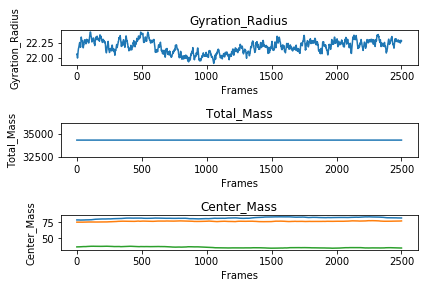

In [47]:
print(f'Total frames: {len(u.trajectory)}')

frame_indexes = np.arange(len(u.trajectory[::20]))

basic_info_dict = {
    "Gyration_Radius":[],
    "Total_Mass":[],
    "Center_Mass":[]
}

for ts in u.trajectory[::20]:
    basic_info_dict["Gyration_Radius"].append(u.atoms.radius_of_gyration())
    basic_info_dict["Total_Mass"].append(u.atoms.total_mass())
    basic_info_dict["Center_Mass"].append(u.atoms.center_of_mass())



for which_key, count in zip(basic_info_dict.keys(), range(len(basic_info_dict))):
    plt.subplot(3, 1, count + 1)
    plt.plot(frame_indexes, basic_info_dict[which_key], label=which_key)
    plt.xlabel("Frames")
    plt.ylabel(which_key)
    plt.title(which_key)

plt.tight_layout()
plt.show()